<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중회귀

특정 공학
- 여러 특성을 사용한 다중 회귀
- 다항 회귀 : 농어의 무게를 어느정도 짐작가능(문제 : 과소적합) => 제곱보다 더 고차항을 넣어야함
- 추가 특성 : 길이, 무게, 높이, 두께
- 특성공학 : 기존 특성을 사용하여 새로운 특성을 만들어 내는 것

다중회귀
- 여러개의 특성을 사용한 선형회귀(3차원 공간) : y = a * x_1 + b * x_2 + c * x_3 + d + 1
- 사용할 특성 : 길이, 높이, 두께
    - 전처리 : 제곱한 값, 각 특성을 서로 곱한 값

<img src = "https://blog.kakaocdn.net/dn/b58Qqd/btqVJSFxnb4/Z8Oiht1ljSpEJOZ67xkWI1/img.png">

## 데이터 준비

판다스
- 데이터 분석용 라이브러리(.csv -> 배열)
- .csv : 엑셀에서 텍스트로 전환한 것(메모장 파일)

### train data

In [114]:
#판다스의 데이터 프레임
import pandas as pd #관례적 별칭

#.csv 확장자의 파일을 읽는 것
#훈련데이터
df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

print("   길이, 높이, 너비\n", perch_full)

   길이, 높이, 너비
 [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35

### test data

In [115]:
#테스트 데이터
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## 전처리과정

In [116]:
from sklearn.model_selection import train_test_split

#훈련세트, 테스트세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [117]:
# 원본데이터의 각각 9번째의 값이 맞는지 확인
print(train_input[0])   #pandas에서 받은 데이터_길이, 높이, 너비(length, height, width)
print(train_target[0])  #numpy 데이터_무게(weight)

[19.6   5.14  3.04]
85.0


### PolynomialFeatures

sklearn의 변환기 : 특성을 만들거나 전처리하는 클래스 사용

변환기(Transformer) : fit(), transform()
- 주의) fit() 메서드와 transform()메서드를 차례대로 실행(훈련을 해야 변환됨)
- ex) 2,3의 경우_ 1,2,3, 2^2(=4), 2*3(=6), 3^2(=9)
- get_feature_names_out() : 계산과정출력

PolynomialFeatures 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가

방정식 : y = a * x_1 + b * x_2 + c * x_3 + d + 1

선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수(특성1, 특성2, 특성3, 1)

In [118]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

# 2개의 특성을 가진 2,3으로 이루어진 샘플 하나를 적용
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


poly.transform([[2,3]])

- 1 (bias)
- 2
- 3
- 4 = 2 ^ 2
- 6 = 2 * 3
- 9 = 3 ^ 2
- 결과 : [[1. 2. 3. 4. 6. 9.]]

In [119]:
# include_bias : bias의 무시여부 확인
# False : '1'을 삭제(자동으로 절편 항은 무시하지만)
poly = PolynomialFeatures(include_bias=False)

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [120]:
#특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

### train_data

In [121]:
#sklearn의 선형모델은 자동으로 bias(1)을 추가하므로 bias의 특성을 만들필요가 없기에 제외(False)
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [122]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### target_data

In [123]:
#재훈련은 필요x
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


## 훈련

In [124]:
#다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
# 결과 : 0.990 => 좋은 결과(물고기의 길이, 높이, 두께까지 사용한 결과)

LinearRegression()

## 훈련평가

In [125]:
print("훈련   : ", lr.score(train_poly, train_target))
print("테스트 : ", lr.score(test_poly, test_target))
print("훈련(0.990) > 테스트(0.971) => 농어의 길이만 사용했지만 과소적합문제x")

훈련   :  0.9903183436982125
테스트 :  0.9714559911594111
훈련(0.990) > 테스트(0.971) => 농어의 길이만 사용했지만 과소적합문제x


### .degree

In [126]:
#degree : 특성조합수
print(poly.degree) #기본수 : 2

2


In [127]:
#만약 정확한 값을 보기 위해 특성조합수을 늘린다면?
#특성을 추가하여 3제곱, 4제곱, 5제곱 항이 추가 -> degree = 5
poly = PolynomialFeatures(degree = 5, include_bias=False)

poly.fit(train_input, train_target)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# (42,9) -> (42, 55)로 특성개수 증가

(42, 55)


In [128]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [129]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [130]:
print("훈련   : ", lr.score(train_poly, train_target))
print("테스트 : ", lr.score(test_poly, test_target))
#이유 : 자료보다 특성이 많아서 생긴 결과값(-144.405)

훈련   :  0.9999999999996433
테스트 :  -144.40579436844948


## 결론

특성 개수를 트게 늘리면 선형모델은 매우 강력

단, 훈련세트에 너무 과대적합

특히 훈련세트가 44개이지만, 55개의 특성을 넣으면 어떻게 될까요?

## 규제(regularization)

- 훈련세트를 너무 과도하게 학습하지 못하게 훼방하는 것

- 훈련세트에 과대적합이 되지 않도록 만드는 것

- 선형회귀모델에 규제를 추가한 모델
    1. 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제(선호)
    2. 라쏘(lasso) : 계수의 절대값을 기준으로 규제를 적용 -> 0으로 제공가능

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FlZyqr%2FbtqZ0tV5B8v%2Fo5H6JLEUsM2sYsWHPICe91%2Fimg.png">

### StandardScaler

sklearn  데이터 전처리 스케일 조정 -> 표준점수로 변환

훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환필수

In [131]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

#표준점수로 변환(훈련세트, 테스트세트)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지(ridge) 회귀

1. 모델객체생성
2. 훈련 : fit()
3. 평가 : score()

In [132]:
from sklearn.linear_model import Ridge

#모델객체 생성시 alpha 매개변수로 규제의 강조 조절
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print("train : ", ridge.score(train_scaled, train_target))
print("test  : ", ridge.score(test_scaled, test_target))
#결론 : 훈련(0.989) > 테스트(0.979) => 좋은 성능임으로 판단

train :  0.9896101671037343
test  :  0.9790693977615387


#### .alpha

규제의 양을 임의로 조절가능

alpha값이 클수록 강도가 세짐(계수값을 더 줄이고 조금 더 과소적합되도록 유도)

적절한 값을 찾는 방법 : ***그래프***

In [133]:
import matplotlib.pyplot as plt

#alpha 값을 바뀔때 마다 score() 메서드의 결과 값을 저장할 리스트 생성
train_score = []
test_score = []

In [134]:
# 0.001 ~ 100 : 10배씩 증가
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)

    #train_scaled : 규제진행된 훈련데이터
    ridge.fit(train_scaled, train_target)

    #훈련점수, 테스트점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


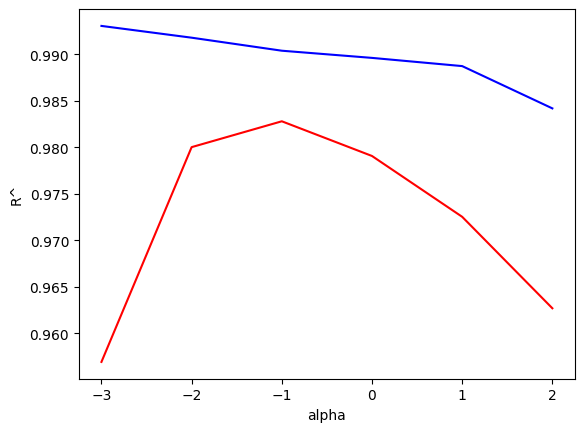

In [135]:
#결과 그래프
#.log10() : x축 값이 너무 촘촘하게 보일수 있기에 지수형식표현
# 0.001 : -3, 0.01 : -2, 0.1 : -1
plt.plot(np.log10(alpha_list), train_score, color = "blue")
plt.plot(np.log10(alpha_list), test_score, color = "red")
plt.xlabel("alpha")
plt.ylabel("R^")
plt.show()
#결과 : -1(=0.1)을 기준으로  왼쪽은 과대적합, 오른쪽은 적상
#alpha 값은 -1(=0.1)이 가장 좋은 것

In [136]:
#alpha = 0.1(가장 좋은 것)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print("train : ", ridge.score(train_scaled, train_target))
print("test  : ", ridge.score(test_scaled, test_target))
#결론 : 훈련(0.990) > 테스트(0.982)

train :  0.9903815817570367
test  :  0.9827976465386928


In [137]:
#alpha = 0.001(제일 안좋은 것)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(train_scaled, train_target)

print("train : ", ridge.score(train_scaled, train_target))
print("test  : ", ridge.score(test_scaled, test_target))
#결론 : 훈련(0.993) > 테스트(0.956) => 약 3.7% 차이

train :  0.9930455252088248
test  :  0.9569388961567329


### 라쏘(Lasso) 회귀

In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

# 릿지만큼의 규제가 적용되어 안정적
print("train : ", lasso.score(train_scaled, train_target))
print("test  : ", lasso.score(test_scaled, test_target))
#결론 : 훈련(0.989) > 테스트(0.980)

train :  0.989789897208096
test  :  0.9800593698421883


#### .alpha & max_iter

In [149]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

# 0.001 ~ 100 : 10배씩 증가
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # max_iter : 최대 반복횟수(정확도를 위함)
    #ConvergenceWarning : 지정한 반복횟수가 부족하면 경고가뜸
    lasso = Lasso(alpha = alpha, max_iter = 10000)

    #train_scaled : 규제진행된 훈련데이터
    lasso.fit(train_scaled, train_target)

    #훈련점수, 테스트점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

print(train_score)
print(test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


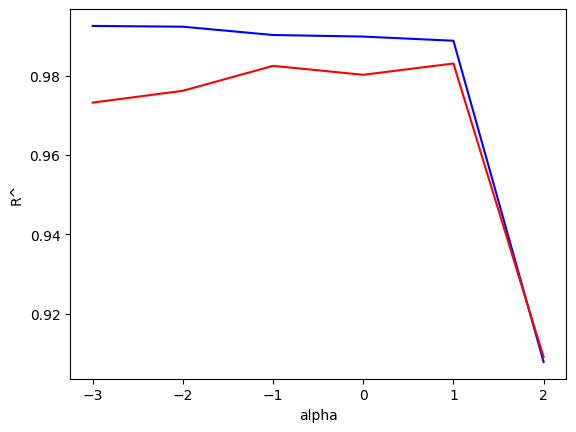

In [144]:
#결과 그래프
#.log10() : x축 값이 너무 촘촘하게 보일수 있기에 지수형식표현
# 0.001 : -3, 0.01 : -2, 0.1 : -1
plt.plot(np.log10(alpha_list), train_score, color = "blue")
plt.plot(np.log10(alpha_list), test_score, color = "red")
plt.xlabel("alpha")
plt.ylabel("R^")
plt.show()
#결과 : 1(=10)을 기준으로  왼쪽은 과대적합, 오른쪽은 적상
#alpha 값은 1(=10)이 가장 좋은 것

In [146]:
#alpha = 10(가장 좋은 것)
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print("train : ", lasso.score(train_scaled, train_target))
print("test  : ", lasso.score(test_scaled, test_target))
#결론 : 훈련(0.988) > 테스트(0.982)

train :  0.9888067471131867
test  :  0.9824470598706695
